In [ ]:
!pip install wntr

In [ ]:
!pip uninstall numpy wntr -y
!pip install numpy wntr --no-cache-dir

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: wntr 1.3.2
Uninstalling wntr-1.3.2:
  Successfully uninstalled wntr-1.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 206.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy wntr --no-cache-dir
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.7 MB/s eta 0:00:00


In [ ]:
import wntr
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
inp_file = "Walkerton_with_Bezier.inp"
wn = wntr.network.WaterNetworkModel(inp_file)

In [ ]:
print(f"Number of junctions: {len(wn.junction_name_list)}")
print(f"Number of pipes: {len(wn.pipe_name_list)}")
print(f"Number of reservoirs: {len(wn.reservoir_name_list)}")
print(f"Number of tanks: {len(wn.tank_name_list)}")

Number of junctions: 321
Number of pipes: 368
Number of reservoirs: 3
Number of tanks: 2


In [ ]:
!pip install --upgrade wntr

<ipython-input-6-ece79a50add8>:9: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G = wn.get_graph()


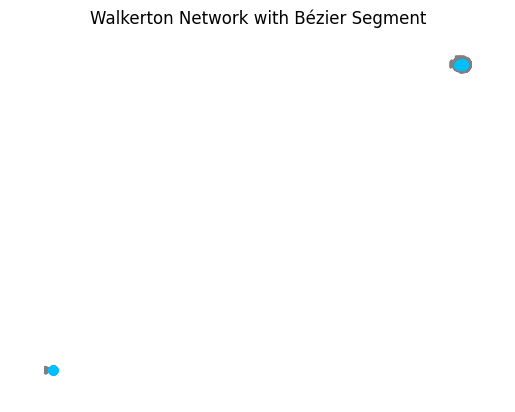

In [ ]:
import wntr
import matplotlib.pyplot as plt
import networkx as nx


wn = wntr.network.WaterNetworkModel('Walkerton_with_Bezier.inp')


G = wn.get_graph()
pos = nx.get_node_attributes(G, 'pos')


node_color = 'deepskyblue'
link_color = 'gray'
node_size = 40
link_width = 1.5


nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)


nx.draw_networkx_edges(G, pos, width=link_width, edge_color=link_color)


plt.title("Walkerton Network with Bézier Segment", fontsize=12)


plt.axis('off')


plt.show()

<Figure size 1100x600 with 0 Axes>

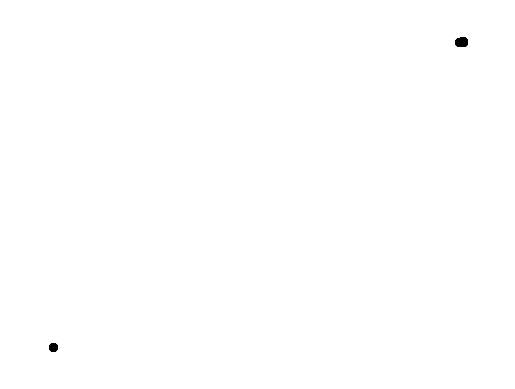

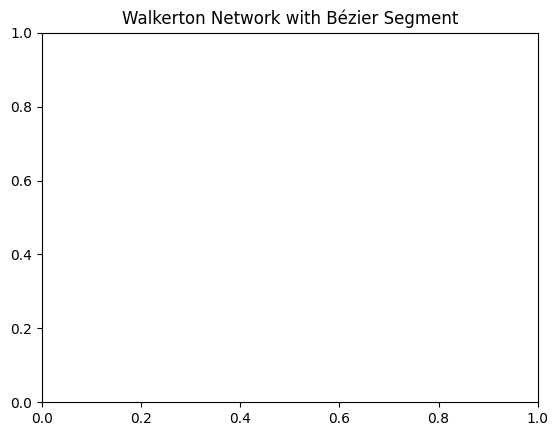

In [ ]:
plt.figure(figsize=(11, 6))
wntr.graphics.plot_network(
    wn,
    node_attribute=None,
    node_size=40
)
plt.title("Walkerton Network with Bézier Segment")
plt.show()

In [ ]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
pressure = results.node['pressure']

In [ ]:
print("\nПочаткові значення тиску у J_BEZ_6:")
print(pressure.loc[:, 'J_BEZ_6'].head())


Початкові значення тиску у J_BEZ_6:
0       -100.0
3600    -100.0
7200    -100.0
10800   -100.0
14400   -100.0
Name: J_BEZ_6, dtype: float32


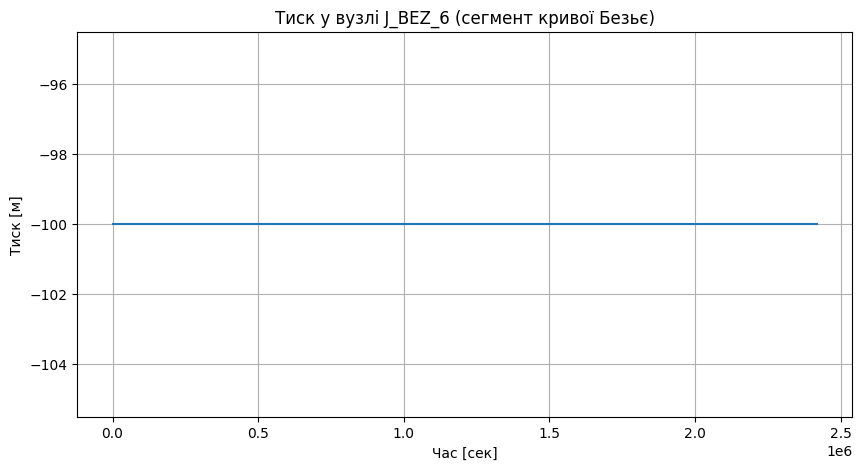

In [ ]:
pressure.loc[:, 'J_BEZ_6'].plot(
    figsize=(10, 5),
    title="Тиск у вузлі J_BEZ_6 (сегмент кривої Безьє)",
    ylabel="Тиск [м]",
    xlabel="Час [сек]",
    grid=True
)
plt.show()

In [ ]:
bezier_nodes = [f"J_BEZ_{i+1}" for i in range(11)]
bezier_pipes = [f"P_BEZ_{i+1}" for i in range(10)]

<ipython-input-20-1e01ec0bb577>:12: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G = wn.get_graph()


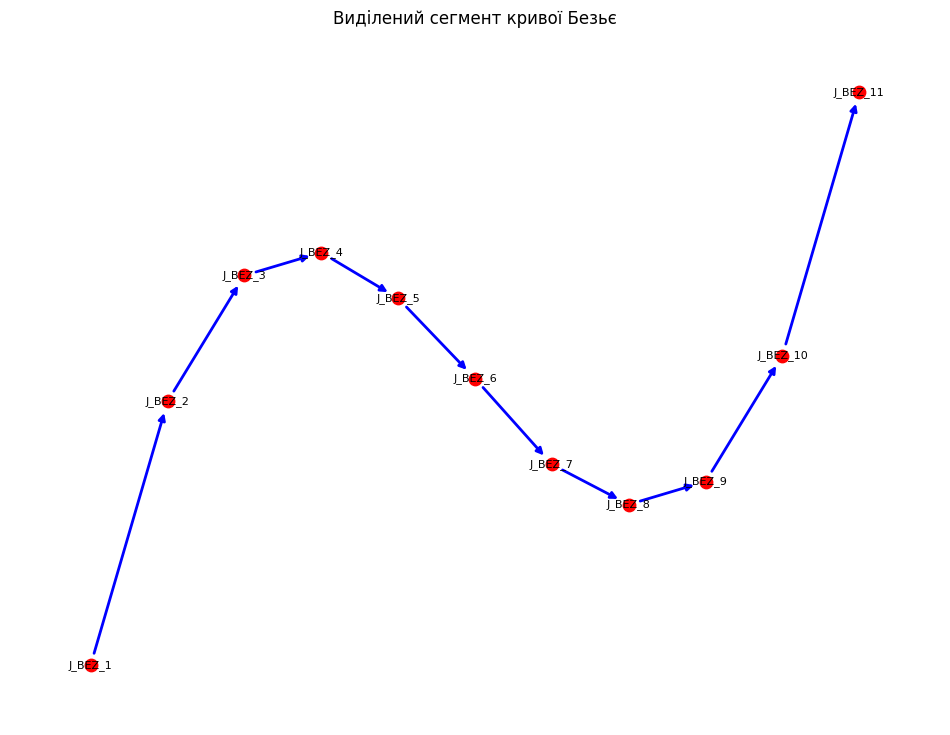

In [ ]:
import wntr
import matplotlib.pyplot as plt
import networkx as nx

wn = wntr.network.WaterNetworkModel('Walkerton_with_Bezier.inp')


bezier_nodes = [f"J_BEZ_{i+1}" for i in range(11)]
bezier_pipes = [f"P_BEZ_{i+1}" for i in range(10)]


G = wn.get_graph()
pos = nx.get_node_attributes(G, 'pos')


bezier_edges = []
for pipe_name in bezier_pipes:
    pipe = wn.get_link(pipe_name)
    bezier_edges.append((pipe.start_node_name, pipe.end_node_name))


plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(G, pos, nodelist=bezier_nodes, node_color='red', node_size=80)
nx.draw_networkx_edges(G, pos, edgelist=bezier_edges, edge_color='blue', width=2.0)
nx.draw_networkx_labels(G, pos, labels={n: n for n in bezier_nodes}, font_size=8)

plt.title("Виділений сегмент кривої Безьє")
plt.axis('off')
plt.show()

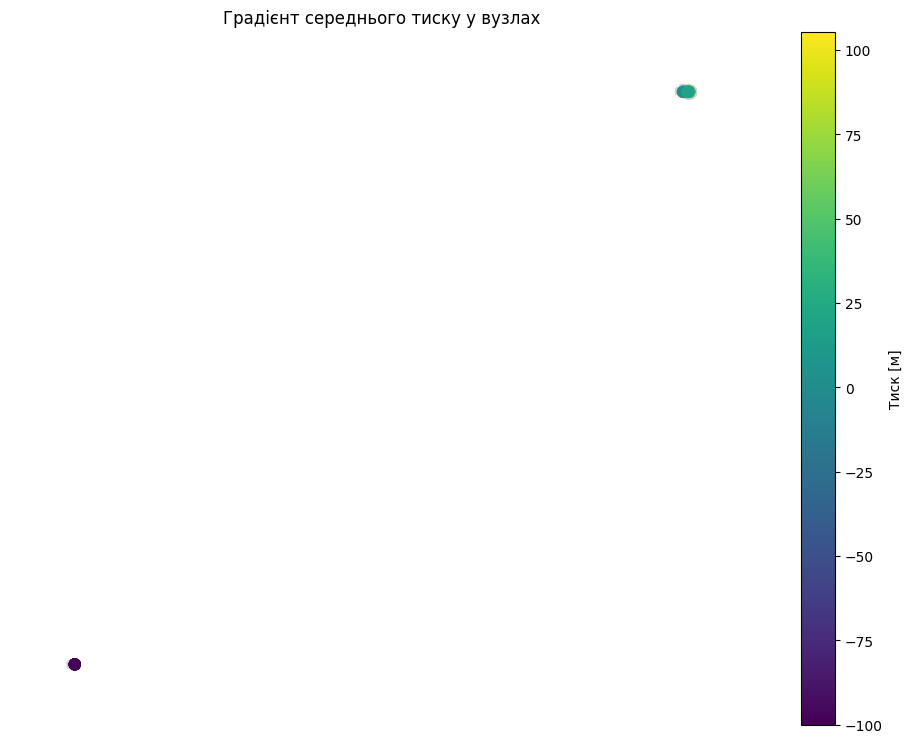

In [ ]:

mean_pressure = pressure.mean()

valid_nodes = [n for n in mean_pressure.index if n in pos]

node_pressures = [mean_pressure[n] for n in valid_nodes]
node_positions = {n: pos[n] for n in valid_nodes}

plt.figure(figsize=(12, 9))
nodes = nx.draw_networkx_nodes(
    G, node_positions, nodelist=valid_nodes,
    node_color=node_pressures,
    cmap='viridis', node_size=60
)
nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1.0)

plt.title("Градієнт середнього тиску у вузлах")
plt.axis('off')
plt.colorbar(nodes, label='Тиск [м]')
plt.show()

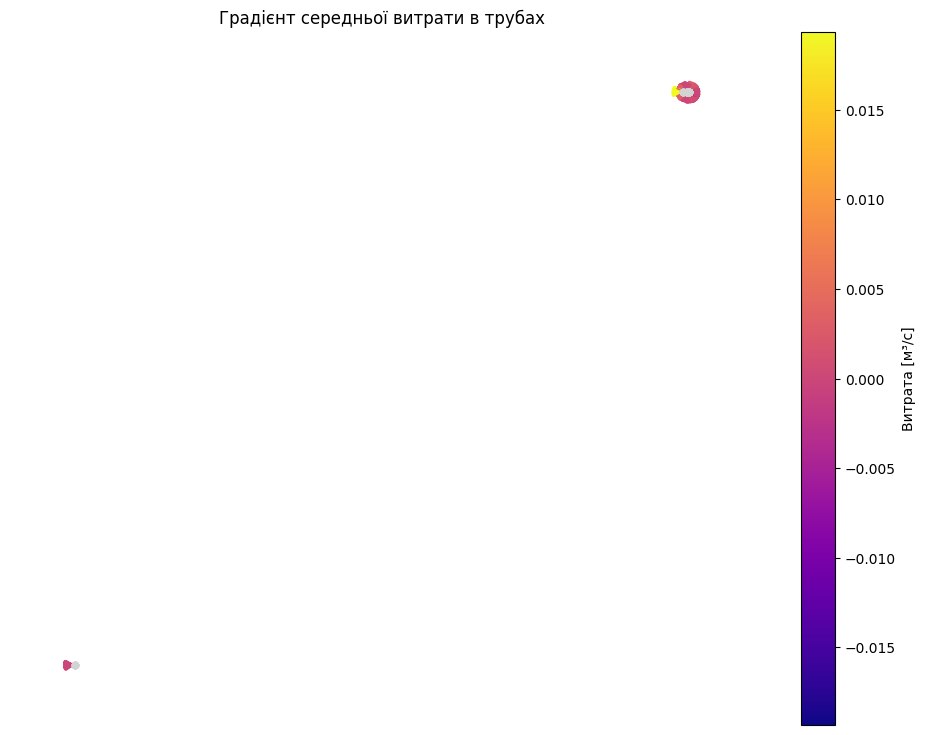

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

mean_flow = results.link['flowrate'].mean()

edges = []
flow_values = []
for link_name in mean_flow.index:
    if link_name in wn.pipe_name_list:
        link = wn.get_link(link_name)
        edge = (link.start_node_name, link.end_node_name)
        if edge[0] in pos and edge[1] in pos:
            edges.append(edge)
            flow_values.append(mean_flow[link_name])

norm = mcolors.Normalize(vmin=min(flow_values), vmax=max(flow_values))
cmap = cm.plasma
edge_colors = [cmap(norm(val)) for val in flow_values]

fig, ax = plt.subplots(figsize=(12, 9))

nx.draw_networkx_nodes(G, pos, node_size=20, node_color='lightgray', ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2.5, ax=ax)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Витрата [м³/с]')

ax.set_title("Градієнт середньої витрати в трубах")
ax.axis('off')
plt.show()